# Exploratory Data Analysis for Report

**Project**: Predicting High-Rating Airbnb Listings in Amsterdam

**Purpose**: Generate visualizations and insights for the Data Understanding section of the report

**Report Sections Covered**:
- Section 1: Dataset Overview
- Section 2: Business Understanding
- Section 3: Key Features Analysis

---

## Setup and Configuration

In [172]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Setup plotting style / 设置绘图样式
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [173]:
# Get project paths / 获取项目路径
# Automatically detect project root (assuming notebook is in src/dataset_overview_for_report/)
current_dir = Path.cwd()

# Check if we're in the dataset_overview_for_report directory
if current_dir.name == 'dataset_overview_for_report':
    # Go up two levels: dataset_overview_for_report -> src -> project_root
    project_root = current_dir.parent.parent
elif current_dir.name == 'src':
    # If we're in src directory
    project_root = current_dir.parent
else:
    # Assume we're already at project root
    project_root = current_dir

data_dir = project_root / 'data'
output_dir = project_root / 'charts' / 'charts_for_report'
output_dir.mkdir(parents=True, exist_ok=True)

print(f"📁 Project Root: {project_root}")
print(f"📁 Data Directory: {data_dir}")
print(f"📁 Output Directory: {output_dir}")

📁 Project Root: /Users/cba/Desktop/uva/course/data science/project
📁 Data Directory: /Users/cba/Desktop/uva/course/data science/project/data
📁 Output Directory: /Users/cba/Desktop/uva/course/data science/project/charts/charts_for_report


## Load Data

We use the original datasets from 2021 and 2025 for our analysis.

In [174]:
# Load 2021 and 2025 listings data
print("Loading data...\n")

# Load 2021 data
listings_2021_path = data_dir / 'listings_detailed.xlsx'

listings_2021 = pd.read_excel(listings_2021_path)
print(f"✅ Loaded 2021 data: {len(listings_2021):,} records × {len(listings_2021.columns)} columns")

# Load 2025 data
listings_2025_path = project_root / 'data' / '2025' / 'listings_detailed.csv'

listings_2025 = pd.read_csv(listings_2025_path)
print(f"✅ Loaded 2025 data: {len(listings_2025):,} records × {len(listings_2025.columns)} columns")

Loading data...

✅ Loaded 2021 data: 16,116 records × 74 columns
✅ Loaded 2025 data: 10,480 records × 79 columns


In [175]:
# Load other datasets (2021) for reference
print("\nLoading additional datasets (2021)...\n")

# Reviews dataset
reviews_path = data_dir / 'reviews.csv'
reviews = pd.read_csv(reviews_path)
print(f"✅ Reviews: {len(reviews):,} records × {len(reviews.columns)} columns")


# Calendar dataset
calendar_path = data_dir / 'calendar_summary.csv'

try:
    calendar = pd.read_csv(calendar_path, sep=';')
    print(f"✅ Calendar: {len(calendar):,} records × {len(calendar.columns)} columns")
except:
    calendar = pd.read_csv(calendar_path)
    print(f"✅ Calendar: {len(calendar):,} records × {len(calendar.columns)} columns")

# Neighbourhoods dataset
neighbourhoods_path = data_dir / 'neighbourhoods.csv'
neighbourhoods = pd.read_csv(neighbourhoods_path)
print(f"✅ Neighbourhoods: {len(neighbourhoods):,} records × {len(neighbourhoods.columns)} columns")



Loading additional datasets (2021)...



✅ Reviews: 397,185 records × 2 columns
✅ Calendar: 21,210 records × 3 columns
✅ Neighbourhoods: 22 records × 2 columns


## Data Merging Process

We merge the 2021 and 2025 datasets to enable temporal comparison analysis.

In [176]:
# Analyze column differences
print("DATA MERGING PROCESS")
print("="*80)

cols_2021 = set(listings_2021.columns)
cols_2025 = set(listings_2025.columns)

common_cols = cols_2021 & cols_2025
only_2021_cols = cols_2021 - cols_2025
only_2025_cols = cols_2025 - cols_2021
print(f"\n📊 Column Analysis:")
print(f"  Common columns: {len(common_cols)}")
print(f"  Only in 2021: {len(only_2021_cols)}")
print(f"  Only in 2025: {len(only_2025_cols)}")

if only_2021_cols:
    print(f"\n  Columns only in 2021: {sorted(list(only_2021_cols))[:10]}{'...' if len(only_2021_cols) > 10 else ''}")
if only_2025_cols:
    print(f"  Columns only in 2025: {sorted(list(only_2025_cols))[:10]}{'...' if len(only_2025_cols) > 10 else ''}")


DATA MERGING PROCESS

📊 Column Analysis:
  Common columns: 74
  Only in 2021: 0
  Only in 2025: 5
  Columns only in 2025: ['availability_eoy', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'number_of_reviews_ly', 'source']


**Data Merging Results**:

- ✅ Merged dataset: 26,596 records × 75 columns
- 2021: 16,116 records
- 2025: 10,480 records

**Column Analysis**:
- Common columns: 74
- Only in 2021: 0
- Only in 2025: 5
- Columns only in 2025: `availability_eoy`, `estimated_occupancy_l365d`, `estimated_revenue_l365d`, `number_of_reviews_ly`, `source`


In [177]:
# Add year identifier and merge
listings_2021['data_year'] = 2021
listings_2025['data_year'] = 2025

# Use common columns for merging
merge_cols = list(common_cols) + ['data_year']

# Align columns
df_2021_aligned = listings_2021[merge_cols].copy()
df_2025_aligned = listings_2025[merge_cols].copy()

# Merge datasets
df_merged = pd.concat([df_2021_aligned, df_2025_aligned], ignore_index=True)
print(f"\n✅ Merged dataset: {len(df_merged):,} records × {len(df_merged.columns)} columns")
print(f"  2021: {(df_merged['data_year'] == 2021).sum():,} records")
print(f"  2025: {(df_merged['data_year'] == 2025).sum():,} records")
print("\n" + "="*80)



✅ Merged dataset: 26,596 records × 75 columns
  2021: 16,116 records
  2025: 10,480 records



---
# Section 1: Dataset Overview

This section provides an overview of the datasets used in this project.

---

## 1.1 Dataset Scale Summary (2021)

In [178]:
# Create dataset summary table
print("\n📊 Dataset Scale Summary (2021)")
print("="*80)

dataset_summary = pd.DataFrame({
    'Dataset': [
        'listings_detailed',
        'reviews', 
        'calendar_summary',
        'neighbourhoods'
    ],
    'Records': [
        f"{len(listings_2021):,}",
        f"{len(reviews):,}" if reviews is not None else 'N/A',
        f"{len(calendar):,}" if calendar is not None else 'N/A',
        f"{len(neighbourhoods):,}" if neighbourhoods is not None else 'N/A'
    ],
    'Columns': [
        len(listings_2021.columns),
        len(reviews.columns) if reviews is not None else 'N/A',
        len(calendar.columns) if calendar is not None else 'N/A',
        len(neighbourhoods.columns) if neighbourhoods is not None else 'N/A'
    ],
    'Description': [
        'Main dataset with listing details, host info, reviews, and pricing',
        'Individual review records with timestamps',
        'Calendar availability and pricing by date',
        'Neighbourhood names and geographic groupings'
    ]
})

print(dataset_summary.to_string(index=False))
print("\n" + "="*80)

print("\n💡 Dataset Relationships:")
print("-" * 80)
print("• listings_detailed: Core dataset containing aggregated metrics")
print("• reviews: Provides validation data and can be used for deep feature engineering")
print("• calendar_summary: Provides validation data and can be used for pricing/availability analysis")
print("• neighbourhoods: Provides validation data and geographic context for location-based features")
print("\n📌 Note: The listings_detailed dataset already contains aggregated information")
print("   from these related datasets (e.g., number_of_reviews, availability_30/60/90/365).")
print("="*80)


📊 Dataset Scale Summary (2021)
          Dataset Records  Columns                                                        Description
listings_detailed  16,116       75 Main dataset with listing details, host info, reviews, and pricing
          reviews 397,185        2                          Individual review records with timestamps
 calendar_summary  21,210        3                          Calendar availability and pricing by date
   neighbourhoods      22        2                       Neighbourhood names and geographic groupings


💡 Dataset Relationships:
--------------------------------------------------------------------------------
• listings_detailed: Core dataset containing aggregated metrics
• reviews: Provides validation data and can be used for deep feature engineering
• calendar_summary: Provides validation data and can be used for pricing/availability analysis
• neighbourhoods: Provides validation data and geographic context for location-based features

📌 Note: The lis

## 1.2 Temporal Distribution


📅 Temporal Distribution:
  2021: 16,116 records (60.60%)
  2025: 10,480 records (39.40%)


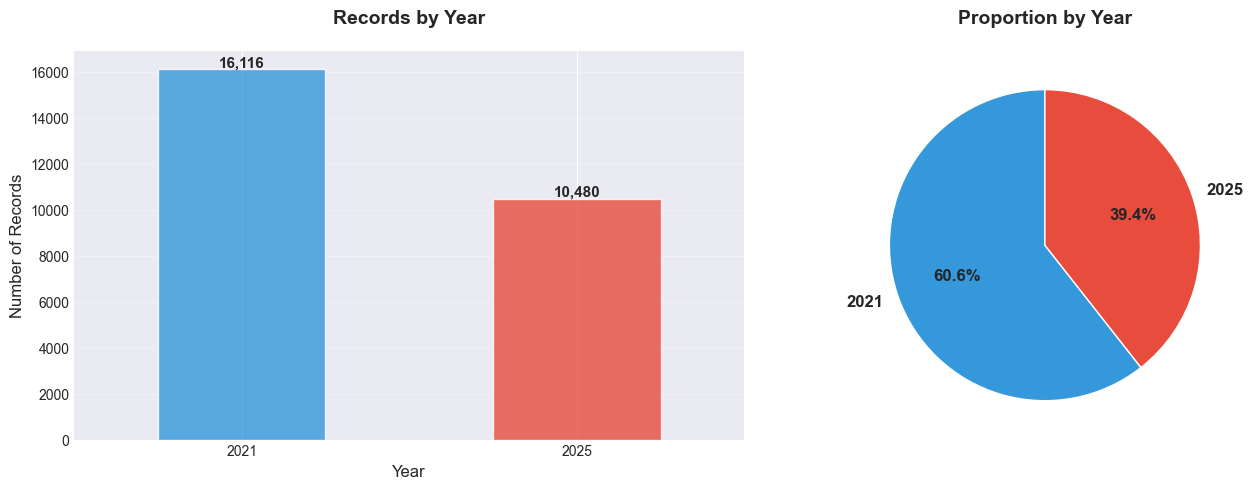

In [179]:
# Temporal distribution
year_counts = df_merged['data_year'].value_counts().sort_index()

print("\n📅 Temporal Distribution:")
print("="*50)
for year, count in year_counts.items():
    pct = count / len(df_merged) * 100
    print(f"  {int(year)}: {count:6,} records ({pct:5.2f}%)")
print("="*50)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ax1 = axes[0]
year_counts.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'], alpha=0.8)
ax1.set_title('Records by Year', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Records', fontsize=12)
ax1.set_xticklabels([int(x) for x in year_counts.index], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (year, count) in enumerate(year_counts.items()):
    ax1.text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
ax2 = axes[1]
colors = ['#3498db', '#e74c3c']
wedges, texts, autotexts = ax2.pie(
    year_counts.values, 
    labels=[f"{int(year)}" for year in year_counts.index],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
ax2.set_title('Proportion by Year', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(output_dir / '1_temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



## 1.3 Feature Categories

In [180]:
# Feature categorization

feature_categories = {
    'Identifiers': ['id', 'listing_url', 'scrape_id'],
    'Location': ['latitude', 'longitude', 'neighbourhood', 'neighbourhood_cleansed', 
                 'neighbourhood_group_cleansed'],
    'Property Info': ['property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 
                      'bathrooms', 'bathrooms_text'],
    'Pricing': ['price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
                'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'],
    'Availability & Calendar': ['has_availability', 'availability_30', 'availability_60', 
                                'availability_90', 'availability_365', 'calendar_updated',
                                'calendar_last_scraped'],
    'Reviews & Ratings': ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                          'first_review', 'last_review', 'review_scores_rating', 
                          'review_scores_accuracy', 'review_scores_cleanliness', 
                          'review_scores_checkin', 'review_scores_communication',
                          'review_scores_location', 'review_scores_value', 'reviews_per_month'],
    'Host Info': ['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 
                  'host_about', 'host_neighbourhood', 'host_listings_count',
                  'host_total_listings_count'],
    'Host Verification': ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                          'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
                          'host_identity_verified'],
    'Host Media': ['host_thumbnail_url', 'host_picture_url', 'picture_url'],
    'Amenities': ['amenities'],
    'Text Descriptions': ['name', 'description', 'neighborhood_overview'],
    'Booking Settings': ['instant_bookable', 'license'],
    'Scraping Info': ['last_scraped'],
    'Calculated Fields': ['calculated_host_listings_count', 
                          'calculated_host_listings_count_entire_homes',
                          'calculated_host_listings_count_private_rooms',
                          'calculated_host_listings_count_shared_rooms']
}

category_counts = {}
category_features = {}
for category, features in feature_categories.items():
    existing_features = [f for f in features if f in df_merged.columns]
    category_counts[category] = len(existing_features)
    category_features[category] = existing_features

total_categorized = sum(category_counts.values())
other_features = df_merged.shape[1] - total_categorized

# Store results for markdown display
feature_summary = pd.DataFrame({
    'Category': list(category_counts.keys()),
    'Feature Count': list(category_counts.values())
})

if other_features > 0:
    feature_summary = pd.concat([
        feature_summary,
        pd.DataFrame({'Category': ['Other'], 'Feature Count': [other_features]})
    ], ignore_index=True)

feature_summary = feature_summary.sort_values('Feature Count', ascending=False)
feature_summary

,Category,Feature Count
5,Reviews & Ratings,13
3,Pricing,9
6,Host Info,9
2,Property Info,7
4,Availability & Calendar,7
7,Host Verification,7
1,Location,5
13,Calculated Fields,4
0,Identifiers,3
8,Host Media,3


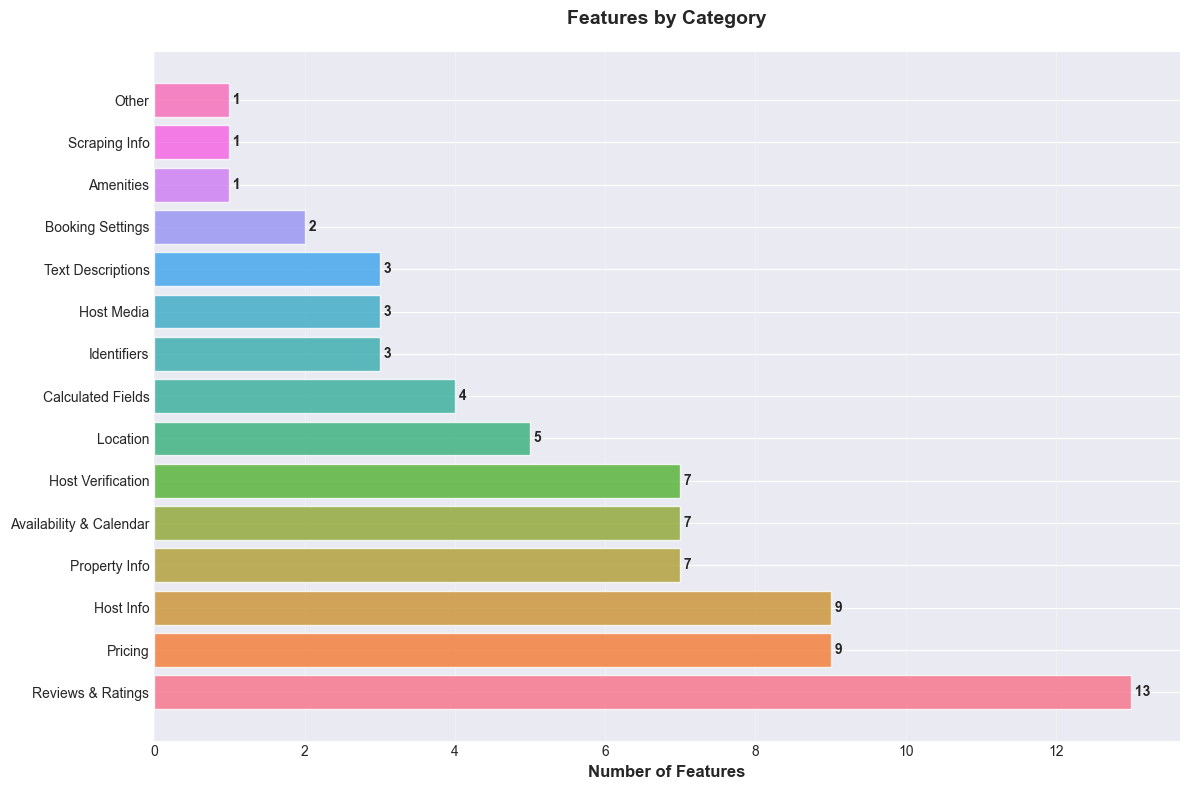

In [181]:
# Visualize feature categories
fig, ax = plt.subplots(figsize=(12, 8))

categories = list(category_counts.keys())
counts = list(category_counts.values())

if other_features > 0:
    categories.append('Other')
    counts.append(other_features)

# Sort by count for better visualization
sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories_sorted = [x[0] for x in sorted_data]
counts_sorted = [x[1] for x in sorted_data]

bars = ax.barh(categories_sorted, counts_sorted, color=sns.color_palette("husl", len(categories_sorted)), alpha=0.8)
ax.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
ax.set_title('Features by Category', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, counts_sorted)):
    ax.text(count, i, f' {count}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / '2_feature_categories.png', dpi=300, bbox_inches='tight')
plt.show()



## 1.4 Data Quality Overview

In [182]:
# Missing values analysis
missing_stats = pd.DataFrame({
    'Missing_Count': df_merged.isnull().sum(),
    'Missing_Percent': (df_merged.isnull().sum() / len(df_merged) * 100)
}).sort_values('Missing_Percent', ascending=False)

missing_stats = missing_stats[missing_stats['Missing_Count'] > 0]

# Display top 15 fields with most missing values
missing_stats.head(15)

,Missing_Count,Missing_Percent
neighbourhood_group_cleansed,26596,100.000000
calendar_updated,26596,100.000000
bathrooms,20664,77.695894
host_response_rate,14877,55.936983
host_response_time,14877,55.936983
host_neighbourhood,13403,50.394796
host_acceptance_rate,13375,50.289517
host_about,12026,45.217326
license,11680,43.916378
neighbourhood,10999,41.355843


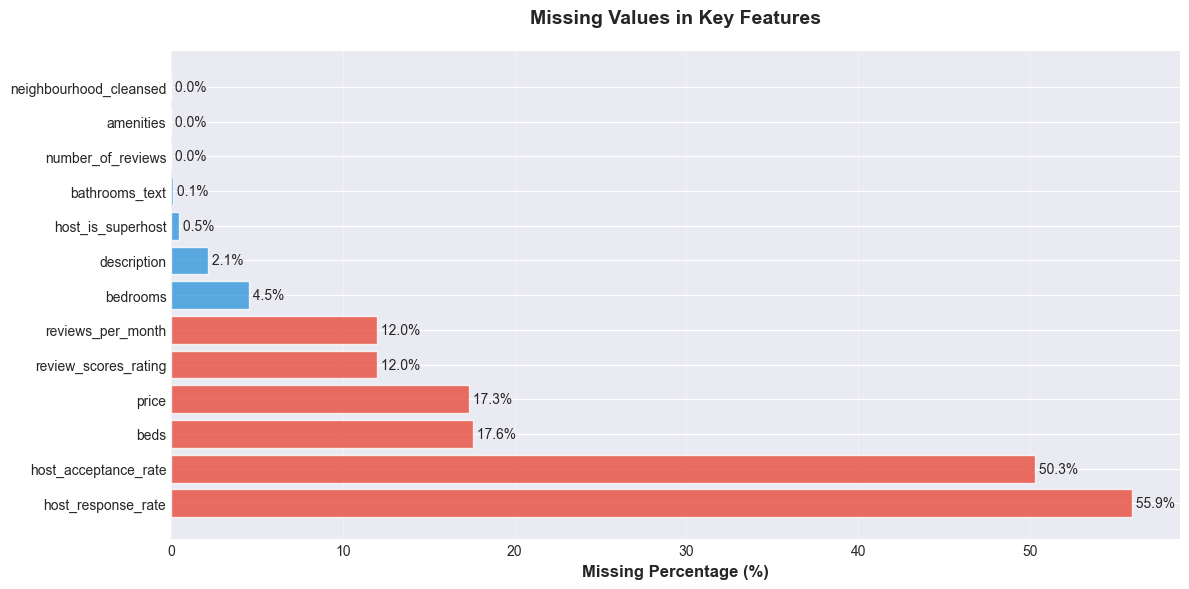

In [183]:
# Visualize missing values for key features
key_features = ['review_scores_rating', 'price', 'bedrooms', 'beds', 'bathrooms_text',
                'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                'number_of_reviews', 'reviews_per_month', 'amenities',
                'neighbourhood_cleansed', 'description']

key_features_existing = [f for f in key_features if f in df_merged.columns]

if key_features_existing:
    missing_key = df_merged[key_features_existing].isnull().sum().sort_values(ascending=False)
    missing_key_pct = (missing_key / len(df_merged) * 100)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    bars = ax.barh(range(len(missing_key_pct)), missing_key_pct.values, 
                   color=['#e74c3c' if x > 10 else '#3498db' for x in missing_key_pct.values],
                   alpha=0.8)
    
    ax.set_yticks(range(len(missing_key_pct)))
    ax.set_yticklabels(missing_key_pct.index)
    ax.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_title('Missing Values in Key Features', fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, (bar, pct) in enumerate(zip(bars, missing_key_pct.values)):
        ax.text(pct, i, f' {pct:.1f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(output_dir / '3_missing_values_key_features.png', dpi=300, bbox_inches='tight')
    plt.show()
    


---
# Section 2: Business Understanding
---

## 2.1 Business Problem

**Research Question**: What factors contribute to high-rating Airbnb listings in Amsterdam?

**Business Value**:
1. **For Hosts**: Identify actionable insights to improve listing quality and guest satisfaction
2. **For Airbnb Platform**: Better recommendation system and quality control
3. **For Guests**: Improved search experience and booking confidence

## 2.2 Target Variable: Review Scores Rating

In [184]:
# Basic statistics
rating_stats = df_merged['review_scores_rating'].describe()

# Display as DataFrame
pd.DataFrame({
    'Statistic': rating_stats.index,
    'Value': rating_stats.values
})

,Statistic,Value
0,count,23412.000000
1,mean,4.752884
2,std,0.547718
3,min,0.000000
4,25%,4.710000
5,50%,4.880000
6,75%,5.000000
7,max,5.000000


## 2.3 Rating Distribution Comparison (2021 vs 2025)

**Key Insight**: The rating distribution differs significantly between 2021 and 2025.

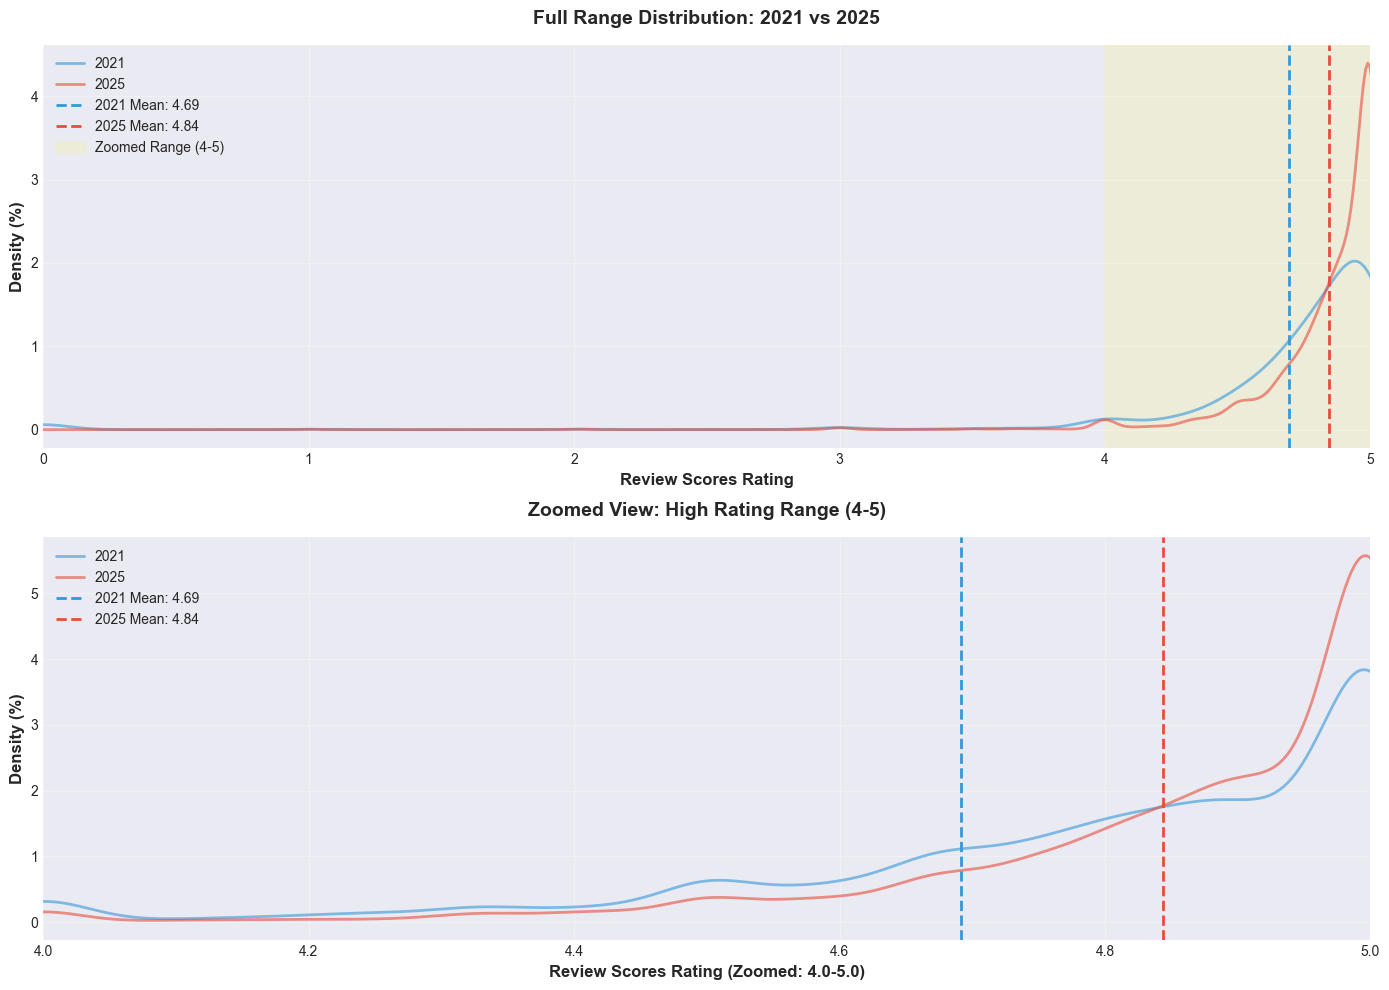

In [185]:
# Rating distribution comparison
if 'review_scores_rating' in df_merged.columns:
    df_with_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()
    
    rating_2021 = df_with_rating[df_with_rating['data_year'] == 2021]['review_scores_rating']
    rating_2025 = df_with_rating[df_with_rating['data_year'] == 2025]['review_scores_rating']
    
    # Create two-panel comparison
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Panel 1: Full range
    ax1 = axes[0]
    rating_2021.plot(kind='density', ax=ax1, color='#3498db', alpha=0.6, label='2021', linewidth=2)
    rating_2025.plot(kind='density', ax=ax1, color='#e74c3c', alpha=0.6, label='2025', linewidth=2)
    
    ax1.axvline(rating_2021.mean(), color='#3498db', linestyle='--', linewidth=2, 
                label=f'2021 Mean: {rating_2021.mean():.2f}')
    ax1.axvline(rating_2025.mean(), color='#e74c3c', linestyle='--', linewidth=2, 
                label=f'2025 Mean: {rating_2025.mean():.2f}')
    
    ax1.axvspan(4.0, 5.0, alpha=0.1, color='yellow', label='Zoomed Range (4-5)')
    
    ax1.set_xlabel('Review Scores Rating', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Density (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Full Range Distribution: 2021 vs 2025', fontsize=14, fontweight='bold', pad=15)
    ax1.legend(loc='upper left', fontsize=10)
    ax1.grid(alpha=0.3)
    ax1.set_xlim(0, 5)
    
    # Panel 2: Zoomed (4.0-5.0)
    ax2 = axes[1]
    rating_2021_high = rating_2021[(rating_2021 >= 4.0) & (rating_2021 <= 5.0)]
    rating_2025_high = rating_2025[(rating_2025 >= 4.0) & (rating_2025 <= 5.0)]
    
    rating_2021_high.plot(kind='density', ax=ax2, color='#3498db', alpha=0.6, label='2021', linewidth=2)
    rating_2025_high.plot(kind='density', ax=ax2, color='#e74c3c', alpha=0.6, label='2025', linewidth=2)
    
    ax2.axvline(rating_2021.mean(), color='#3498db', linestyle='--', linewidth=2, 
                label=f'2021 Mean: {rating_2021.mean():.2f}')
    ax2.axvline(rating_2025.mean(), color='#e74c3c', linestyle='--', linewidth=2, 
                label=f'2025 Mean: {rating_2025.mean():.2f}')
    
    ax2.set_xlabel('Review Scores Rating (Zoomed: 4.0-5.0)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Density (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Zoomed View: High Rating Range (4-5)', fontsize=14, fontweight='bold', pad=15)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.grid(alpha=0.3)
    ax2.set_xlim(4.0, 5.0)
    
    plt.tight_layout()
    plt.savefig(output_dir / '4_rating_distribution_2021_vs_2025.png', dpi=300, bbox_inches='tight')
    plt.show()
    


In [186]:
# Rating statistics by year

df_with_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()

rating_2021 = df_with_rating[df_with_rating['data_year'] == 2021]['review_scores_rating']
rating_2025 = df_with_rating[df_with_rating['data_year'] == 2025]['review_scores_rating']

# Create comparison table
comparison_df = pd.DataFrame({
    '2021': [
        len(rating_2021),
        rating_2021.mean(),
        rating_2021.median(),
        rating_2021.std(),
        rating_2021.min(),
        rating_2021.max()
    ],
    '2025': [
        len(rating_2025),
        rating_2025.mean(),
        rating_2025.median(),
        rating_2025.std(),
        rating_2025.min(),
        rating_2025.max()
    ]
}, index=['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max'])

comparison_df

,2021,2025
Count,14029.000000,9383.000000
Mean,4.691878,4.844096
Median,4.860000,4.920000
Std Dev,0.668502,0.257871
Min,0.000000,1.000000
Max,5.000000,5.000000


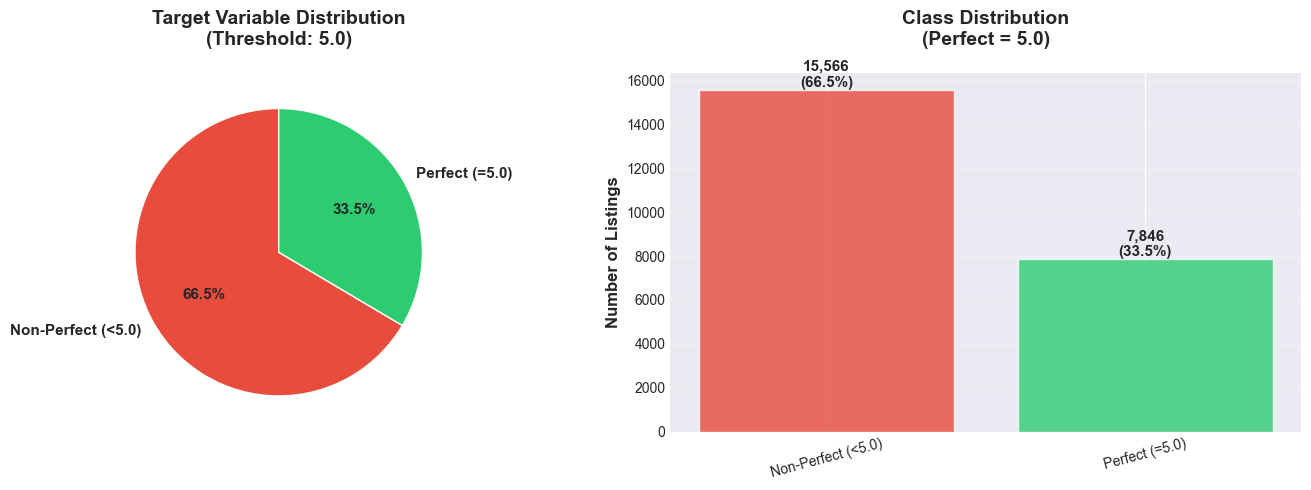

In [187]:
# Define threshold and calculate class distribution
THRESHOLD = 5.0  # Perfect rating threshold

df_with_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()
df_with_rating['is_perfect_rating'] = (df_with_rating['review_scores_rating'] == THRESHOLD).astype(int)

class_dist = df_with_rating['is_perfect_rating'].value_counts()
class_pct = df_with_rating['is_perfect_rating'].value_counts(normalize=True) * 100

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
ax1 = axes[0]
colors = ['#e74c3c', '#2ecc71']
labels = [f'Non-Perfect (<{THRESHOLD})', f'Perfect (={THRESHOLD})']
wedges, texts, autotexts = ax1.pie(
    class_dist.values,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
ax1.set_title(f'Target Variable Distribution\n(Threshold: {THRESHOLD})', 
                fontsize=14, fontweight='bold', pad=20)

# Bar chart
ax2 = axes[1]
bars = ax2.bar(labels, class_dist.values, color=colors, alpha=0.8)
ax2.set_ylabel('Number of Listings', fontsize=12, fontweight='bold')
ax2.set_title(f'Class Distribution\n(Perfect = {THRESHOLD})', 
                fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=15)

for bar, count, pct in zip(bars, class_dist.values, class_pct.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / '5_target_variable_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



In [188]:
# Target variable statistics

df_with_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()
df_with_rating['is_perfect_rating'] = (df_with_rating['review_scores_rating'] == THRESHOLD).astype(int)

class_dist = df_with_rating['is_perfect_rating'].value_counts()
class_pct = df_with_rating['is_perfect_rating'].value_counts(normalize=True) * 100

# Create summary table
target_summary = pd.DataFrame({
    'Category': [f'Non-Perfect (< {THRESHOLD})', f'Perfect (= {THRESHOLD})'],
    'Count': [class_dist[0], class_dist[1]],
    'Percentage': [f'{class_pct[0]:.2f}%', f'{class_pct[1]:.2f}%']
})

target_summary

,Category,Count,Percentage
0,Non-Perfect (< 5.0),15566,66.49%
1,Perfect (= 5.0),7846,33.51%



🎯 Target Variable: Perfect Rating (= 5.0)
  Non-Perfect Rating (< 5.0): 15,566 (66.49%)
  Perfect Rating (= 5.0):       7,846 (33.51%)


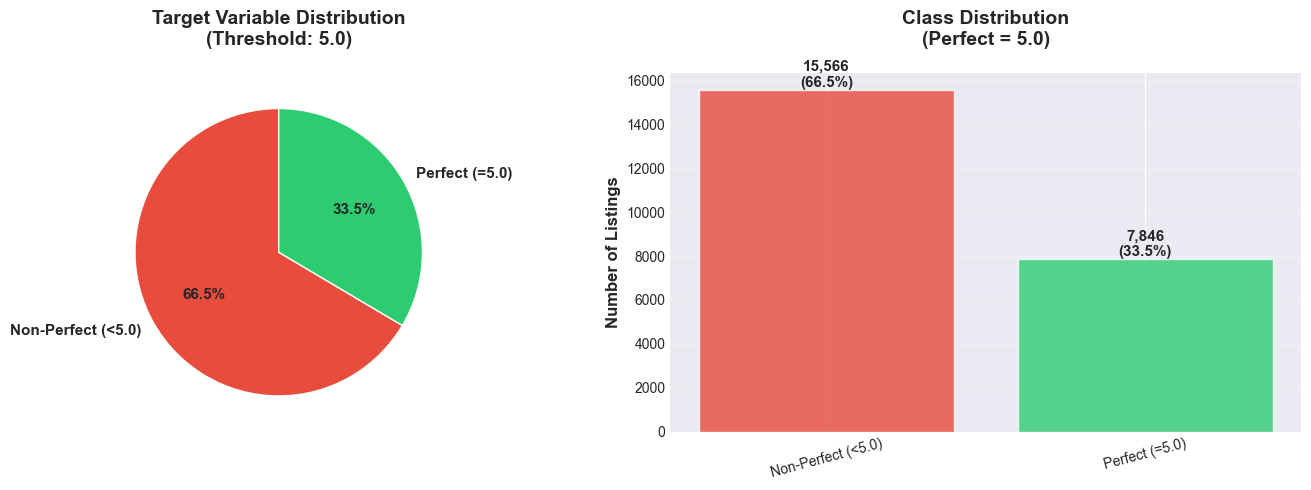

In [189]:
# Define threshold and calculate class distribution
THRESHOLD = 5.0  # Perfect rating threshold

if 'review_scores_rating' in df_merged.columns:
    df_with_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()
    df_with_rating['is_perfect_rating'] = (df_with_rating['review_scores_rating'] == THRESHOLD).astype(int)
    
    class_dist = df_with_rating['is_perfect_rating'].value_counts()
    class_pct = df_with_rating['is_perfect_rating'].value_counts(normalize=True) * 100
    
    print(f"\n🎯 Target Variable: Perfect Rating (= {THRESHOLD})")
    print("="*80)
    print(f"  Non-Perfect Rating (< {THRESHOLD}): {class_dist[0]:6,} ({class_pct[0]:5.2f}%)")
    print(f"  Perfect Rating (= {THRESHOLD}):      {class_dist[1]:6,} ({class_pct[1]:5.2f}%)")
    print("="*80)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart
    ax1 = axes[0]
    colors = ['#e74c3c', '#2ecc71']
    labels = [f'Non-Perfect (<{THRESHOLD})', f'Perfect (={THRESHOLD})']
    wedges, texts, autotexts = ax1.pie(
        class_dist.values,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    ax1.set_title(f'Target Variable Distribution\n(Threshold: {THRESHOLD})', 
                  fontsize=14, fontweight='bold', pad=20)
    
    # Bar chart
    ax2 = axes[1]
    bars = ax2.bar(labels, class_dist.values, color=colors, alpha=0.8)
    ax2.set_ylabel('Number of Listings', fontsize=12, fontweight='bold')
    ax2.set_title(f'Class Distribution\n(Perfect = {THRESHOLD})', 
                  fontsize=14, fontweight='bold', pad=20)
    ax2.grid(axis='y', alpha=0.3)
    ax2.tick_params(axis='x', rotation=15)
    
    for bar, count, pct in zip(bars, class_dist.values, class_pct.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_dir / '5_target_variable_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    


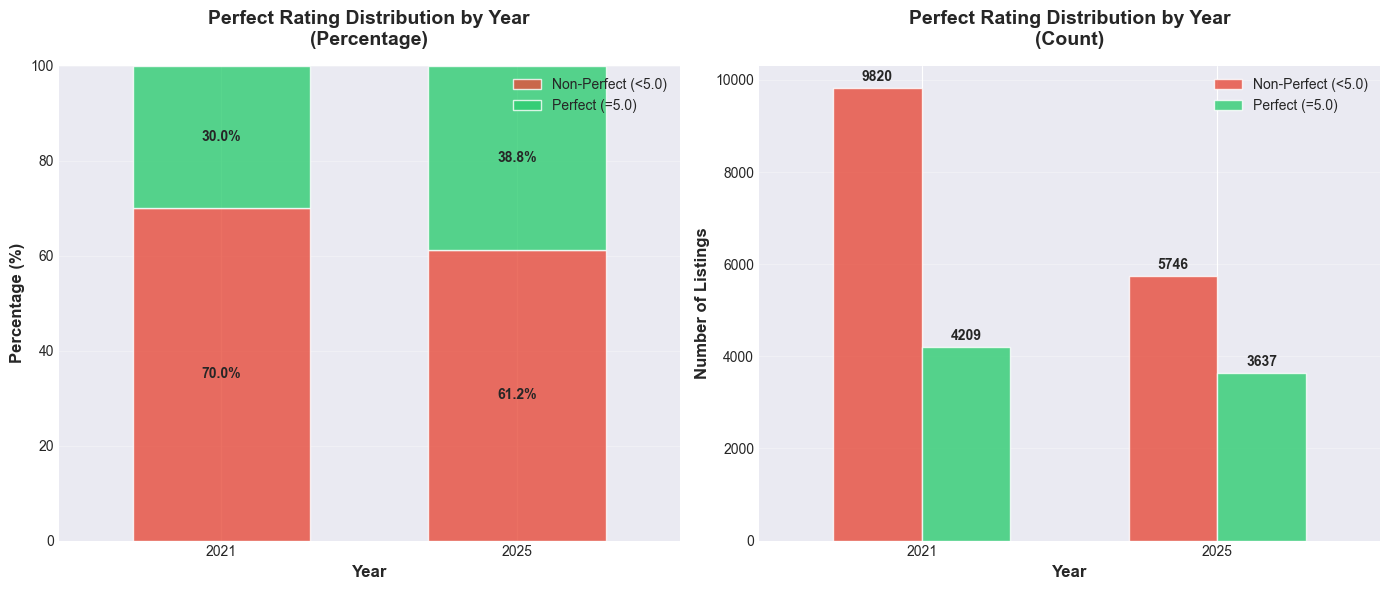

In [190]:
# Perfect rating distribution by year
if 'review_scores_rating' in df_merged.columns and 'data_year' in df_merged.columns:
    df_year_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()
    df_year_rating['is_perfect_rating'] = (df_year_rating['review_scores_rating'] == THRESHOLD).astype(int)
    
    # Calculate proportion by year
    year_rating_crosstab = pd.crosstab(
        df_year_rating['data_year'],
        df_year_rating['is_perfect_rating'],
        normalize='index'
    ) * 100
    
    year_rating_counts = pd.crosstab(
        df_year_rating['data_year'],
        df_year_rating['is_perfect_rating']
    )
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Stacked bar chart (percentage)
    ax1 = axes[0]
    year_rating_crosstab.plot(
        kind='bar',
        stacked=True,
        ax=ax1,
        color=['#e74c3c', '#2ecc71'],
        alpha=0.8,
        width=0.6
    )
    ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Perfect Rating Distribution by Year\n(Percentage)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax1.set_xticklabels([int(x) for x in year_rating_crosstab.index], rotation=0)
    ax1.legend(['Non-Perfect (<5.0)', 'Perfect (=5.0)'], loc='upper right')
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim(0, 100)
    
    # Add percentage labels
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%', label_type='center', fontweight='bold')
    
    # Grouped bar chart (counts)
    ax2 = axes[1]
    year_rating_counts.plot(
        kind='bar',
        ax=ax2,
        color=['#e74c3c', '#2ecc71'],
        alpha=0.8,
        width=0.6
    )
    ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Number of Listings', fontsize=12, fontweight='bold')
    ax2.set_title('Perfect Rating Distribution by Year\n(Count)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xticklabels([int(x) for x in year_rating_counts.index], rotation=0)
    ax2.legend(['Non-Perfect (<5.0)', 'Perfect (=5.0)'], loc='upper right')
    ax2.grid(axis='y', alpha=0.3)
    
    # Add count labels
    for container in ax2.containers:
        ax2.bar_label(container, fmt='%d', padding=3, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_dir / '5b_perfect_rating_by_year.png', dpi=300, bbox_inches='tight')
    plt.show()
    


In [191]:
# Perfect rating statistics by year
df_year_rating = df_merged[df_merged['review_scores_rating'].notna()].copy()
df_year_rating['is_perfect_rating'] = (df_year_rating['review_scores_rating'] == THRESHOLD).astype(int)

# Calculate statistics
year_rating_pct = pd.crosstab(
    df_year_rating['data_year'],
    df_year_rating['is_perfect_rating'],
    normalize='index'
) * 100

year_rating_counts = pd.crosstab(
    df_year_rating['data_year'],
    df_year_rating['is_perfect_rating']
)

# Create summary table
year_summary = pd.DataFrame({
    'Year': [2021, 2025],
    'Non-Perfect Count': [year_rating_counts.loc[2021, 0], year_rating_counts.loc[2025, 0]],
    'Perfect Count': [year_rating_counts.loc[2021, 1], year_rating_counts.loc[2025, 1]],
    'Non-Perfect %': [f'{year_rating_pct.loc[2021, 0]:.2f}%', f'{year_rating_pct.loc[2025, 0]:.2f}%'],
    'Perfect %': [f'{year_rating_pct.loc[2021, 1]:.2f}%', f'{year_rating_pct.loc[2025, 1]:.2f}%']
})

year_summary

,Year,Non-Perfect Count,Perfect Count,Non-Perfect %,Perfect %
0,2021,9820,4209,70.00%,30.00%
1,2025,5746,3637,61.24%,38.76%


---
# Section 3: Key Features Analysis
---

**Superhost vs Perfect Rating**:

- Regular Host: 63.0% Non-Perfect, 37.0% Perfect
- Superhost: 84.6% Non-Perfect, 15.4% Perfect

**Key Insight**: Regular hosts have a higher percentage of perfect ratings (37.0%) compared to superhosts (15.4%).


## 3.1 Pricing Features


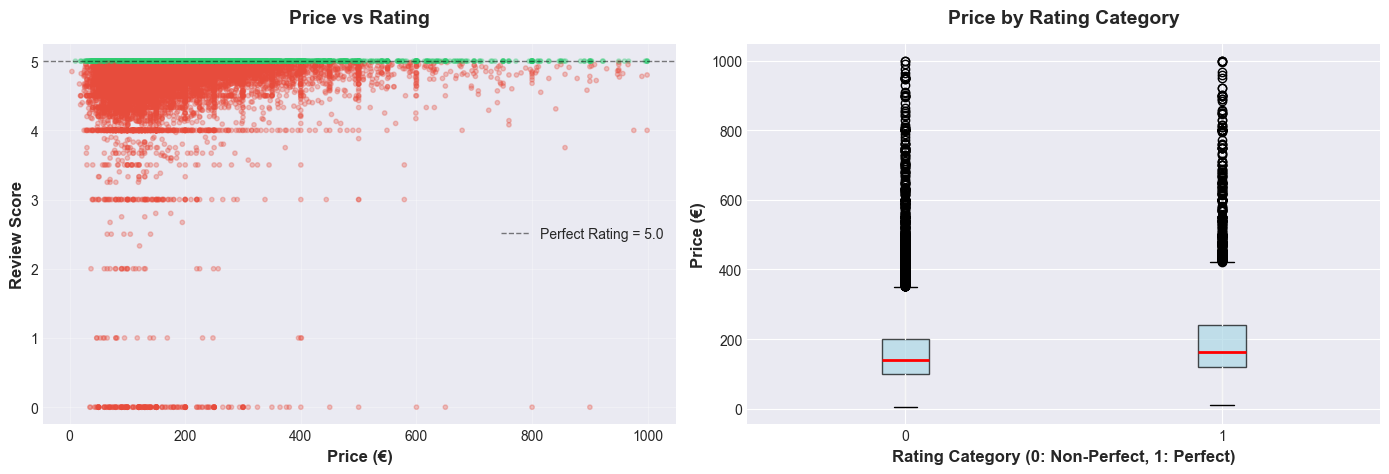

In [192]:
# Price analysis
if 'price' in df_merged.columns and 'review_scores_rating' in df_merged.columns:
    df_price = df_merged.copy()
    
    # Clean price
    if df_price['price'].dtype == 'object':
        df_price['price_clean'] = df_price['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        df_price['price_clean'] = pd.to_numeric(df_price['price_clean'], errors='coerce')
    else:
        df_price['price_clean'] = pd.to_numeric(df_price['price'], errors='coerce')
    
    df_price = df_price[
        (df_price['price_clean'].notna()) & 
        (df_price['price_clean'] > 0) & 
        (df_price['price_clean'] < 1000) &
        (df_price['review_scores_rating'].notna())
    ].copy()
    
    df_price['is_perfect_rating'] = (df_price['review_scores_rating'] == THRESHOLD).astype(int)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot
    ax1 = axes[0]
    colors_scatter = ['#e74c3c' if x == 0 else '#2ecc71' for x in df_price['is_perfect_rating']]
    ax1.scatter(df_price['price_clean'], df_price['review_scores_rating'], 
                c=colors_scatter, alpha=0.3, s=10)
    ax1.set_xlabel('Price (€)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Review Score', fontsize=12, fontweight='bold')
    ax1.set_title('Price vs Rating', fontsize=14, fontweight='bold', pad=15)
    ax1.axhline(THRESHOLD, color='black', linestyle='--', linewidth=1, alpha=0.5, label=f'Perfect Rating = {THRESHOLD}')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Box plot
    ax2 = axes[1]
    df_price.boxplot(column='price_clean', by='is_perfect_rating', ax=ax2,
                     patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    ax2.set_xlabel('Rating Category (0: Non-Perfect, 1: Perfect)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Price (€)', fontsize=12, fontweight='bold')
    ax2.set_title('Price by Rating Category', fontsize=14, fontweight='bold', pad=15)
    plt.suptitle('')
    
    plt.tight_layout()
    plt.savefig(output_dir / '6_price_vs_rating.png', dpi=300, bbox_inches='tight')
    plt.show()
    


In [193]:
# Price statistics by rating category
df_price = df_merged.copy()

# Clean price
if df_price['price'].dtype == 'object':
    df_price['price_clean'] = df_price['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df_price['price_clean'] = pd.to_numeric(df_price['price_clean'], errors='coerce')
else:
    df_price['price_clean'] = pd.to_numeric(df_price['price'], errors='coerce')

df_price = df_price[
    (df_price['price_clean'].notna()) & 
    (df_price['price_clean'] > 0) & 
    (df_price['price_clean'] < 1000) &
    (df_price['review_scores_rating'].notna())
].copy()

df_price['is_perfect_rating'] = (df_price['review_scores_rating'] == THRESHOLD).astype(int)

# Statistics table
df_price.groupby('is_perfect_rating')['price_clean'].describe()

,count,mean,std,min,25%,50%,75%,max
is_perfect_rating,,,,,,,,
0,13164.0,169.106047,109.676900,4.0,100.0,140.0,200.0,999.0
1,6012.0,195.664172,123.617786,10.0,119.0,162.0,240.0,999.0


**Room Type Analysis**:

- Entire home/apt: 18,567 listings
- Private room: 4,656 listings
- Hotel room: 135 listings
- Shared room: 54 listings


## 3.2 Host Features


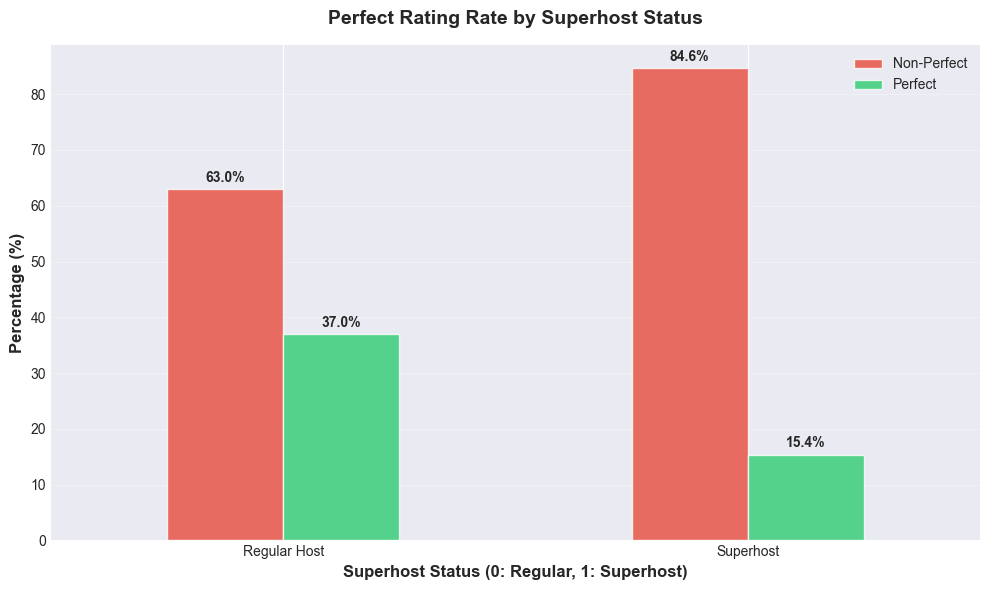

In [194]:
# Superhost analysis
if 'host_is_superhost' in df_merged.columns and 'review_scores_rating' in df_merged.columns:
    df_host = df_merged[df_merged['review_scores_rating'].notna()].copy()
    df_host['is_perfect_rating'] = (df_host['review_scores_rating'] == THRESHOLD).astype(int)
    
    # Parse superhost
    if df_host['host_is_superhost'].dtype == 'object':
        df_host['superhost'] = df_host['host_is_superhost'].str.lower().isin(['t', 'true']).astype(int)
    else:
        df_host['superhost'] = df_host['host_is_superhost'].astype(int)
    
    crosstab = pd.crosstab(
        df_host['superhost'], 
        df_host['is_perfect_rating'],
        normalize='index'
    ) * 100
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    
    crosstab.plot(kind='bar', ax=ax, color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax.set_xlabel('Superhost Status (0: Regular, 1: Superhost)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_title('Perfect Rating Rate by Superhost Status', fontsize=14, fontweight='bold', pad=15)
    ax.set_xticklabels(['Regular Host', 'Superhost'], rotation=0)
    ax.legend(['Non-Perfect', 'Perfect'], loc='upper right')
    ax.grid(axis='y', alpha=0.3)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_dir / '7_superhost_vs_rating.png', dpi=300, bbox_inches='tight')
    plt.show()
    


In [195]:
# Superhost statistics
df_host = df_merged[df_merged['review_scores_rating'].notna()].copy()
df_host['is_perfect_rating'] = (df_host['review_scores_rating'] == THRESHOLD).astype(int)

# Parse superhost
if df_host['host_is_superhost'].dtype == 'object':
    df_host['superhost'] = df_host['host_is_superhost'].str.lower().isin(['t', 'true']).astype(int)
else:
    df_host['superhost'] = df_host['host_is_superhost'].astype(int)

# Create crosstab
crosstab_pct = pd.crosstab(
    df_host['superhost'], 
    df_host['is_perfect_rating'],
    normalize='index'
) * 100

crosstab_pct.index = ['Regular Host', 'Superhost']
crosstab_pct.columns = ['Non-Perfect', 'Perfect']
crosstab_pct

,Non-Perfect,Perfect
Regular Host,62.999745,37.000255
Superhost,84.617421,15.382579


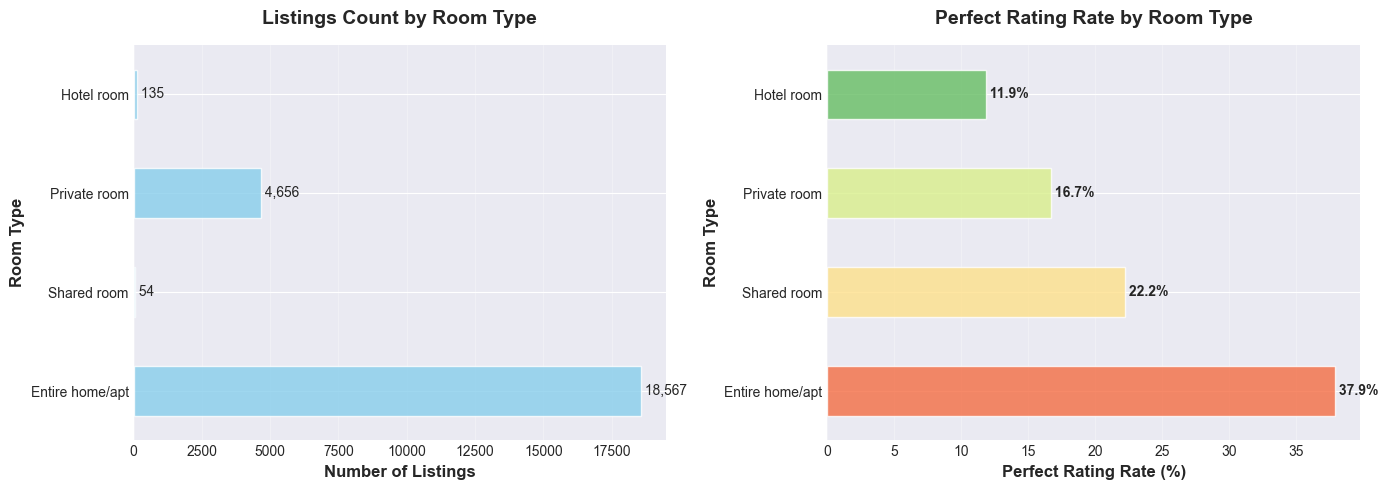

In [196]:
# Room type analysis
df_room = df_merged[df_merged['review_scores_rating'].notna()].copy()
df_room['is_perfect_rating'] = (df_room['review_scores_rating'] == THRESHOLD).astype(int)

room_rating = df_room.groupby('room_type').agg({
    'is_perfect_rating': ['count', 'mean']
})
room_rating.columns = ['count', 'perfect_rating_rate']
room_rating['perfect_rating_rate'] *= 100
room_rating = room_rating.sort_values('perfect_rating_rate', ascending=False)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count
ax1 = axes[0]
room_rating['count'].plot(kind='barh', ax=ax1, color='skyblue', alpha=0.8)
ax1.set_xlabel('Number of Listings', fontsize=12, fontweight='bold')
ax1.set_ylabel('Room Type', fontsize=12, fontweight='bold')
ax1.set_title('Listings Count by Room Type', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3)

for i, v in enumerate(room_rating['count'].values):
    ax1.text(v, i, f' {v:,.0f}', va='center', fontsize=10)

# Perfect rating rate
ax2 = axes[1]
colors_room = sns.color_palette("RdYlGn", len(room_rating))
room_rating['perfect_rating_rate'].plot(kind='barh', ax=ax2, color=colors_room, alpha=0.8)
ax2.set_xlabel('Perfect Rating Rate (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Room Type', fontsize=12, fontweight='bold')
ax2.set_title('Perfect Rating Rate by Room Type', fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3)

for i, v in enumerate(room_rating['perfect_rating_rate'].values):
    ax2.text(v, i, f' {v:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / '8_room_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



## 3.3 Property Features


In [197]:
# Room type statistics
df_room = df_merged[df_merged['review_scores_rating'].notna()].copy()
df_room['is_perfect_rating'] = (df_room['review_scores_rating'] == THRESHOLD).astype(int)

room_rating = df_room.groupby('room_type').agg({
    'is_perfect_rating': ['count', 'mean']
})
room_rating.columns = ['Count', 'Perfect Rating Rate (%)']
room_rating['Perfect Rating Rate (%)'] *= 100
room_rating = room_rating.sort_values('Perfect Rating Rate (%)', ascending=False)
room_rating

,Count,Perfect Rating Rate (%)
room_type,,
Entire home/apt,18567,37.911348
Shared room,54,22.222222
Private room,4656,16.731100
Hotel room,135,11.851852


## 3.4 Geographic Features


🗺️ Geographic Analysis
Valid records with coordinates: 23,412


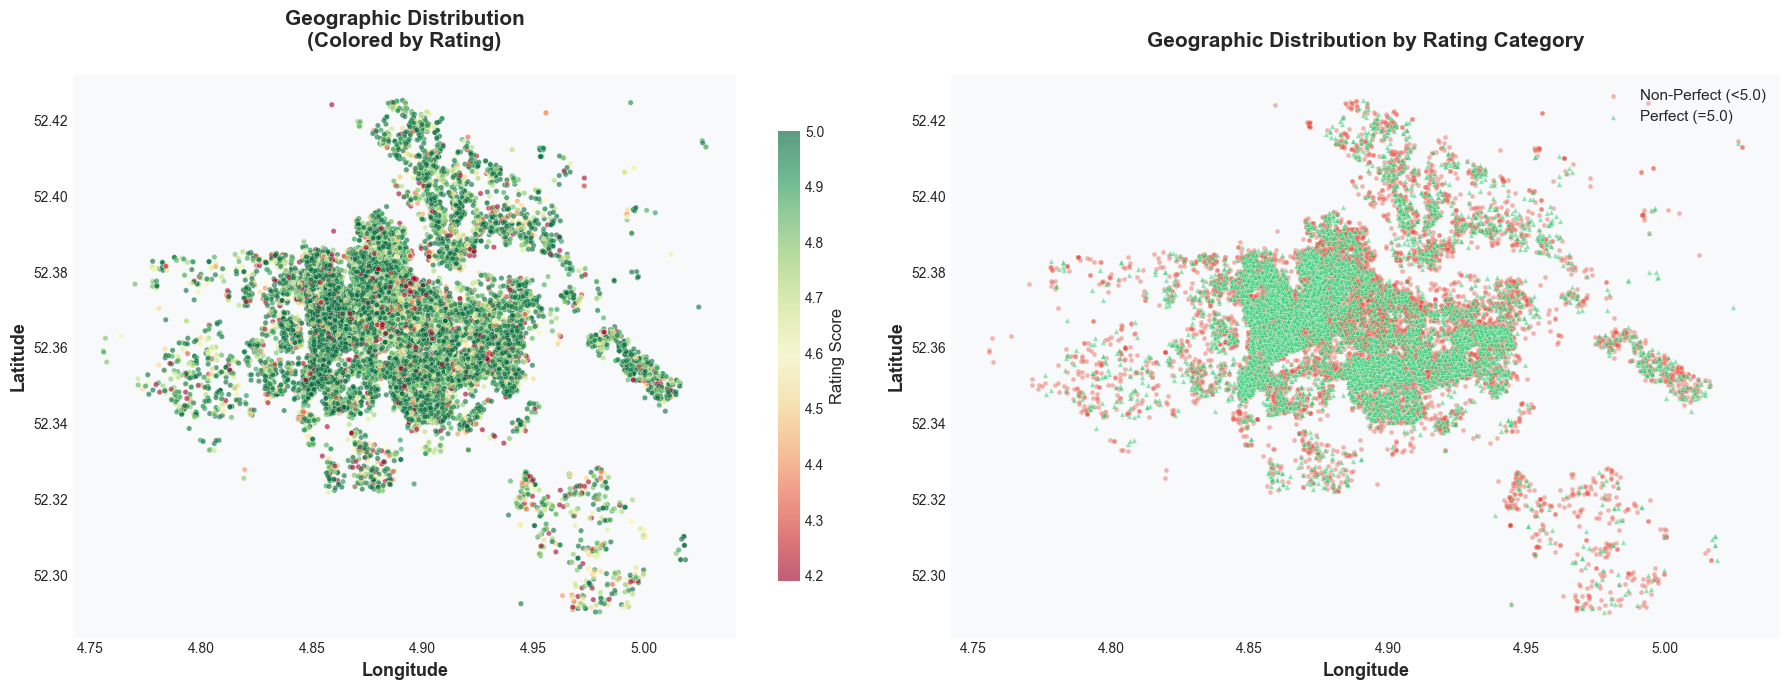


✅ Interactive map saved: /Users/cba/Desktop/uva/course/data science/project/charts/charts_for_report/10_geographic_distribution_interactive.html


In [198]:
# Geographic distribution / 地理分布
if all(col in df_merged.columns for col in ['latitude', 'longitude', 'review_scores_rating']):
    df_geo = df_merged[
        (df_merged['latitude'].notna()) & 
        (df_merged['longitude'].notna()) & 
        (df_merged['review_scores_rating'].notna())
    ].copy()
    
    df_geo['is_perfect_rating'] = (df_geo['review_scores_rating'] == THRESHOLD).astype(int)
    
    print(f"\n🗺️ Geographic Analysis")
    print("="*80)
    print(f"Valid records with coordinates: {len(df_geo):,}")
    print("="*80)
    
    # Visualize / 可视化 - Enhanced version
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Panel 1: All listings colored by rating / 所有房源按评分着色
    ax1 = axes[0]
    scatter1 = ax1.scatter(
        df_geo['longitude'], 
        df_geo['latitude'],
        c=df_geo['review_scores_rating'],
        cmap='RdYlGn',
        alpha=0.6,
        s=15,
        edgecolors='white',
        linewidths=0.3,
        vmin=df_geo['review_scores_rating'].quantile(0.05),
        vmax=df_geo['review_scores_rating'].quantile(0.95)
    )
    ax1.set_xlabel('Longitude', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Latitude', fontsize=13, fontweight='bold')
    ax1.set_title('Geographic Distribution\n(Colored by Rating)', fontsize=15, fontweight='bold', pad=20)
    cbar1 = plt.colorbar(scatter1, ax=ax1, label='Rating Score', shrink=0.8)
    cbar1.ax.tick_params(labelsize=10)
    ax1.grid(alpha=0.3, linestyle='--', linewidth=0.5)
    ax1.set_facecolor('#f8f9fa')
    
    # Panel 2: Perfect vs Non-Perfect rating / 完美评分vs非完美评分
    ax2 = axes[1]
    non_perfect = df_geo[df_geo['is_perfect_rating'] == 0]
    perfect = df_geo[df_geo['is_perfect_rating'] == 1]
    
    ax2.scatter(non_perfect['longitude'], non_perfect['latitude'], 
                c='#e74c3c', alpha=0.4, s=12, edgecolors='white', linewidths=0.2,
                label=f'Non-Perfect (<{THRESHOLD})', marker='o')
    ax2.scatter(perfect['longitude'], perfect['latitude'], 
                c='#2ecc71', alpha=0.5, s=15, edgecolors='white', linewidths=0.3,
                label=f'Perfect (={THRESHOLD})', marker='^')
    
    ax2.set_xlabel('Longitude', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Latitude', fontsize=13, fontweight='bold')
    ax2.set_title('Geographic Distribution by Rating Category', fontsize=15, fontweight='bold', pad=20)
    ax2.legend(loc='upper right', fontsize=11, framealpha=0.9, edgecolor='gray')
    ax2.grid(alpha=0.3, linestyle='--', linewidth=0.5)
    ax2.set_facecolor('#f8f9fa')
    
    plt.tight_layout()
    plt.savefig(output_dir / '10_geographic_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    # Generate interactive HTML map / 生成交互式HTML地图
    try:
        import folium
        from folium.plugins import MarkerCluster
        
        # Calculate center point
        center_lat = df_geo['latitude'].mean()
        center_lon = df_geo['longitude'].mean()
        
        # Create base map
        m = folium.Map(
            location=[center_lat, center_lon],
            zoom_start=12,
            tiles='OpenStreetMap'
        )
        
        # Add marker clusters for perfect ratings
        perfect_cluster = MarkerCluster(name=f'Perfect Rating (={THRESHOLD})').add_to(m)
        perfect_sample = perfect.sample(min(500, len(perfect)))  # Sample for performance
        for idx, row in perfect_sample.iterrows():
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=4,
                popup=f"Rating: {row['review_scores_rating']:.2f}",
                color='#2ecc71',
                fill=True,
                fillColor='#2ecc71',
                fillOpacity=0.6
            ).add_to(perfect_cluster)
        
        # Add marker clusters for non-perfect ratings
        non_perfect_cluster = MarkerCluster(name=f'Non-Perfect (<{THRESHOLD})').add_to(m)
        non_perfect_sample = non_perfect.sample(min(500, len(non_perfect)))  # Sample for performance
        for idx, row in non_perfect_sample.iterrows():
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=3,
                popup=f"Rating: {row['review_scores_rating']:.2f}",
                color='#e74c3c',
                fill=True,
                fillColor='#e74c3c',
                fillOpacity=0.4
            ).add_to(non_perfect_cluster)
        
        # Add layer control
        folium.LayerControl().add_to(m)
        
        # Save HTML
        html_path = output_dir / '10_geographic_distribution_interactive.html'
        m.save(str(html_path))
        print(f"\n✅ Interactive map saved: {html_path}")
        
    except ImportError:
        print("\n⚠️  Folium not installed. Install with: pip install folium")
        print("   Skipping interactive HTML map generation.")



** Please see the HTML for a better visual experience.